# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Изучение данных из файла

### Общая информация

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info() #изучение общей информации об исходном ДатаФрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data_rows_before = data.shape[0] #фиксируем исходное количество строк ДатаФрейма
data_rows_before

23699

In [5]:
pd.set_option('display.max_columns', None)
data.head(15)#наглядное представление исходного ДатаФрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


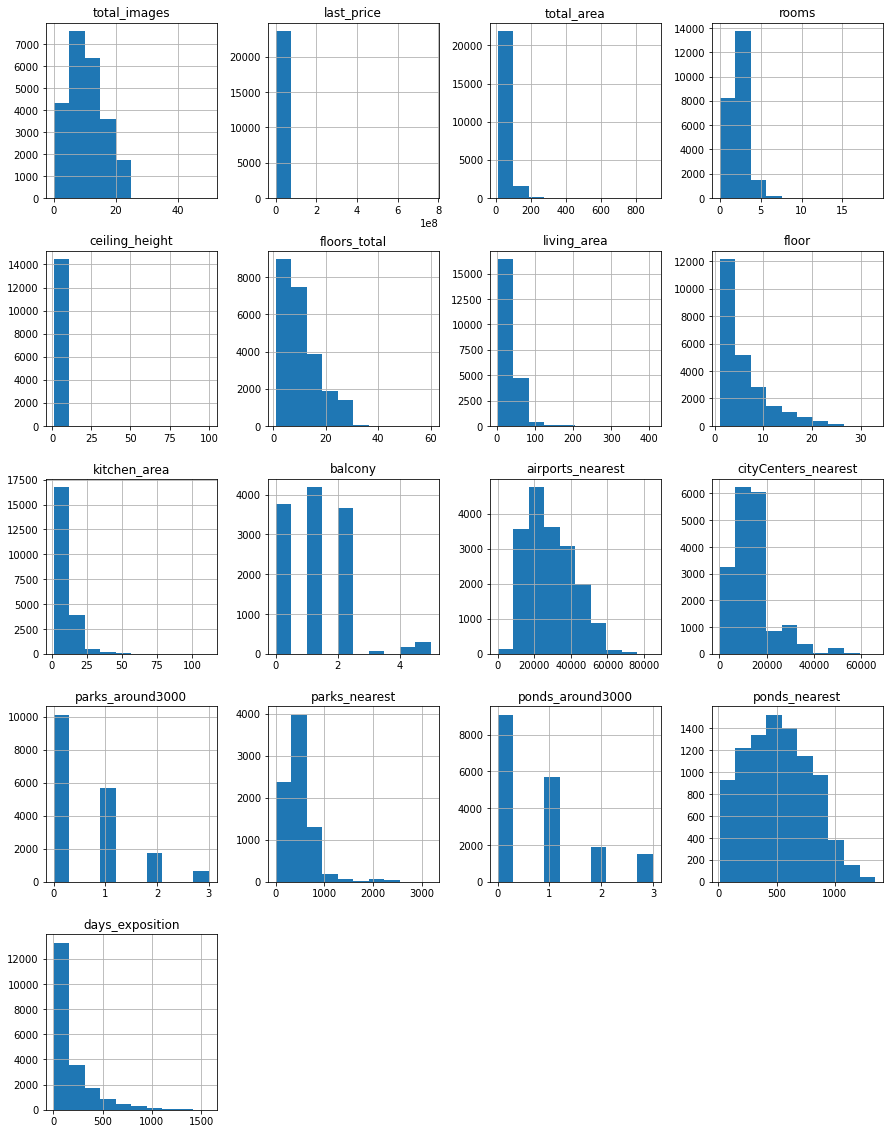

In [6]:
data.hist(figsize=(15, 20)); #построение гистограмм для всех числовых столбцов таблицы

В ходе изучения общей информации об исходных данных были обнаружены:

1. Столбцы с неполным набором данных, то есть имеющие пропуски;

2. Не во всех столбцах указан корректный тип данных для последующей обработки и анализа;

3. По гистограммам количественных значений видно, что есть часть данных, которая в представленной выборке имеет маленький % определенных значений - так сказать, выбросы по имеющимся параметрам.


## Выполнение предобработки данных

### Обработка пропусков

- Поиск пропусков в исходных столбцах:

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

- Заполнение пропусков в столбце - высота потолка

In [8]:
#проверка среднего и медианы в исходных данных Датафрейма по столбцу "ceiling_height"
print(data['ceiling_height'].mean())
data['ceiling_height'].median()

2.77149889685604


2.65

In [9]:
#заполнение произведем с помощью медианного значения
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.head()#проверка заполнения

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


- Пропуски в столбцах с кол-вом балконов, парков и водоемов заполним значением "0" - считаем, что если не указано, значит их нет.

In [10]:
data[['balcony','parks_around3000','ponds_around3000']]=\
        data[['balcony','parks_around3000','ponds_around3000']]\
                    .fillna(0)

- Пропуски в столбце с признаком апартаменты в отношении объекта недвижимости заполним значением "False" с учетом той логики, что если пользователь не указал признак, то считаем, что не является апартаментами.

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False)

- Столбец с наименованием населенного пункта заполним значением 'unknown', чтобы все строки с пропусками можно было идентифицировать и обращаться ко всем ним сразу.

In [12]:
data['locality_name'] = data['locality_name'].fillna('unknown')

- Проверка итогов обработки пропусков

In [13]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Возможные причины появления пропусков в исходных данных:**

  1. **_balcony, ponds_around3000, parks_around3000_** - не заполнены по причине отсутствия балконов (в случае заполнения пользователем), а также водоемов и парков (в случае определения геосервисом по картам). Пропуски заполнены значением "0", так как можно полагать, что если данных нет, то значит данный параметр в объекте недвижимости отсутствует в принципе.


  2. **_ceiling_height, living_area, kitchen_area_** - пользователь не знает точных параметров, либо посчитал ненужным заполнение этих данных(в случае необязательного поля для заполнения), посчитал достаточным заполнить общую площадь объекта. Заполнять пропуски средним или медианным значением для данных по площадям нерационально поскольку в объектах недвижимости могут быть параметры нестандартыми, то есть иметь уникальные характеристики, а стоимость всегда будет зависеть в том числе и от размеров объекта. Касаемо потолков можно заполнить медианым значением, так как в большинстве своем высота потолка в объектах недвижимости чаще всего встречается одинаковая - среднее не берем для перестраховки от сильно отклоняющихся аномальных значений.


  3. **_is apartment_** - пропуски могли образоваться в связи с тем, что пользователь посчитал, если у него не апартаменты, то и отмечать это нет необходимости (в случае необязательного поля для заполнения). Пропуски заменены на "False" с той логикой, что если не отмечен тип недвижимости "апартаменты" - можем предположить, что это второй тип недвижимости.


  4. **_parks_nearest, airports_nearest, ponds_nearest, cityCenters_nearest_** - в геосервисе может быть заложен радиус допустимой близости к объекту для получения данных по расстоянию. Заменить пропуски, к примеру, на "0", говоря об отсутствии близости к объекту не предоставляется логичным, так как сложиться впечатление, что близость максимальная к объекту недвижимости.


  5. **_floors_total_** - пользователь решил не указывать эти данные (в случае необязательного поля для заполнения) - к тому же, именно этаж объекта по всем строкам заполнен. Количество этажей не совсем типовой параметр для объектов недвижимости, чтобы путем логики можно было для пустых строк значение заполнить корректно.


  6. **_days_exposition_** - пропуски могли образоваться, если на момент выгрузки данных объявление все еще не было снято. Заменить не предоставляется возможным.


  7. **_locality_name_** - не было заполнено пользователем или данные неопределились геосервисом, если сервисом проводится проверка ввода определенного формата адреса. Заполнен для идентификации значением 'unknown'.

### Изменение типов данных

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

- Приведение значений столбцов "balcony", "parks_around3000" и "ponds_around3000" к целому числу

In [15]:
data[['balcony','parks_around3000','ponds_around3000']]=\
         data[['balcony','parks_around3000','ponds_around3000']]\
            .astype('int')

- Приводим столбец "first_day_exposition" с датой и временем к соответствующему типу данных "datetime"

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],\
                                              format = '%Y-%m-%dT%H:%M:%S')

- Проверка изменения типов данных в таблице

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

**Основания для изменения типов данных:**

  1. **_first_day_exposition_** - датафрейм определяет данных как тип 'object', но в самой таблице видно, что данные представлены как дата и время, поэтому необходимо привести их к типу 'datetime'


  2. **_balcony, parks_around3000, ponds_around3000_** - представлены как данные типа 'float', но говоря о количестве балконов, водоемов и парков нельзя сказать, что такие объекты могут быть нецелыми в количестве, поэтому их приводим к целому числу типа 'int'.


  3. **_floors_total_** - данный параметр тоже следовало бы привести к типу 'int', так как количество этажей всегда является целым числом. Но поскольку имеются пропуски, то привести к нужному типу 'int' нет возможности - критично на анализ и данные не должен повлиять тип данных 'float'.

### Обработка дубликатов

- Вывод уникальных значений столбца с наименованием населенных пунктов

In [18]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

- Замена обнаруженных неявных дубликатов: "посЁлок" на "посЕлок" и "городской поселок","поселок городского типа" на "поселок"

In [19]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')\
        .replace(['городской поселок', 'поселок городского типа'], 'поселок',\
                 regex=True)

- Проверка итогов обработки дубликатов

In [20]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

В ходе анализа были выявлены и заменены следующие неявные дубликаты:


   1. Разное написание слов "поселок"/"посёлок" с применением либо буквы "е", либо "ё" - все дубликаты были приведены к написанию с буквой "е".
    
   2. Написание одного и того же населенного пункта с двумя видами описаний "поселок городского типа"/"городской поселок" -  приведены к единному названию "поселок".

## Добавление в таблицу новых столбцов

Для более глубокого анализа необходимо дополнить таблицу новыми параметрами:

       - цена одного квадратного метра;
    
       - день недели, месяц и год публикации объявления;
    
       - тип этажа квартиры;
       
       - расстояние до центра города в км.

- Расчет цены за м2 путем деления стоимости объекты недвижимости на его общую площадь

In [21]:
data['price_per_metr2'] = (data['last_price']/data['total_area']).round(2) 
#с применением округления до 2х знаков после запятой

- Добавление столбцов с днями неделями, месяцами и годами публикации каждого объявления

In [22]:
data['weekday'] = data['first_day_exposition']. dt.day_name() #вычисление дня недели
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month #вычисление месяца
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year #вычисление года

- Перевод значений столбца "cityCenters_nearest" из м в км

In [23]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round() 
#с применением округления до целого числа

- Приведение к необходимому формату столбца с днями неделями

In [24]:
def num_weekday(weekday):
    try:
        if weekday == 'Monday':
            return '0'
        elif weekday == 'Tuesday':
            return '1'
        elif weekday == 'Wednesday':
            return '2'
        elif weekday == 'Thursday':
            return '3'
        elif weekday == 'Friday':
            return '4'
        elif weekday == 'Saturday':
            return '5'
        elif weekday == 'Sunday':
            return '6'
    except:
        pass

In [25]:
data['num_weekday'] = data['weekday'].apply(num_weekday).astype('int')
#создание нового столбца через применение написанной функции к столбцу 'weekday'
#также приведение типа данных к целому числу

- Категоризация столбца с указанием этажа, на котором находится объект недвижимости

In [26]:
def name_floor(x):
    try:
        if x['floor'] == x['floors_total']:
            return 'последний'
        elif x['floor'] == 1:
                return 'первый'
        return 'другой'
    except:
        pass

In [27]:
data['type_floor'] = data.apply(lambda x: name_floor(x), axis = 1)
#создание нового столбца через применение написанной функции к ДатаФрейму

- Проверка итогов добавления новых параметров для анализа

In [28]:
data.head(20) #просмотр первых 20 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr2,weekday,month,year,cityCenters_nearest_km,num_weekday,type_floor
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,Thursday,3,2019,16.0,3,другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,Tuesday,12,2018,19.0,1,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,Thursday,8,2015,14.0,3,другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,Friday,7,2015,7.0,4,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,Tuesday,6,2018,8.0,1,другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0,поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,Monday,9,2018,NaN,0,другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.71,Thursday,11,2017,19.0,3,другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.69,Thursday,4,2019,12.0,3,другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.76,Wednesday,5,2018,NaN,2,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.59,Sunday,2,2017,15.0,6,другой


В рамках 3 этапа были добавлены столбцы со следующими параметрами для анализа:

   - цена одного квадратного метра;
    
   - день недели, месяц и год публикации объявления;
    
   - тип этажа квартиры;
       
   - расстояние до центра города в км.


## Исследовательский анализ данных

### Обработка аномалий и выбивающихся значений

In [29]:
#импорт библиотеки для работы с графиками
import matplotlib.pyplot as plt

В процессе обработки аномалий и выбивающихся значений поработаем с такими столбцами как:
 
 1. Высота потолков (один из значимых параметров объекта недвижимости).
 
 
 2. Общей площадью как основного параметра размера объекта недвижимости, который включает в себя и жилую площадь и кухонную. Также на гистрограмме при первом знакомстве с данными видно было выбросы по данному показателю.
 
 
 3. И с количеством комнат, тоже считается одним из важных параметров для оценки недвижимости. Также по гистограмме в начале исследования видны были выбросы.

- Высота потолков

In [30]:
#вывод уникальных значений по столбцу
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [31]:
#функция для замены выбивающихся значений
def height_change(x):
    if 20 <= x <= 40:
        return x/10
    elif 4 < x <20:
        return 2.65 #замена значений на медиану
    elif x > 40:
        return 2.65 #замена значений на медиану
    elif x < 2.5:
        return 2.5 #замена на минимальное значение по ГОСТу
    return x

In [32]:
data['ceiling_height'] = data['ceiling_height'].apply(height_change)

In [33]:
data['ceiling_height'].unique() #проверка обработки столбца

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 3.5 ,
       3.3 , 2.71, 4.  , 2.73, 2.84, 3.1 , 3.4 , 3.06, 2.72, 2.54, 2.51,
       2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59, 3.6 , 2.92, 3.11,
       3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12, 2.53, 2.74, 2.96, 2.79,
       2.95, 2.94, 3.82, 3.54, 3.53, 2.83, 3.38, 3.01, 3.65, 3.9 , 3.18,
       3.35, 3.57, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88,
       3.67, 3.87, 3.66, 3.85, 3.86, 3.24, 3.36, 3.08, 3.68, 3.07, 3.37,
       3.09, 3.26, 3.34, 2.81, 3.44, 2.97, 3.14, 2.68, 3.22, 3.27, 2.93,
       3.46, 2.4 , 3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 3.28, 3.04,
       3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 3.39, 2.69, 3.31, 3.56, 3.51,
       3.93, 3.42, 2.99, 3.49, 2.91, 3.88, 3.29, 2.  , 3.76, 3.69, 2.26,
       2.89, 3.58, 3.48, 3.59])

- Общая площадь объекта недвижимости

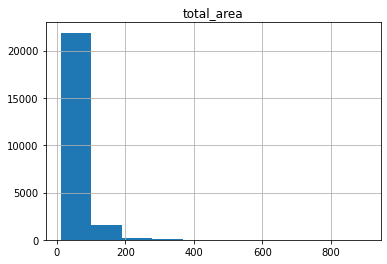

In [34]:
data.hist('total_area');

In [35]:
data = data.query('total_area <= 200')
#удаляем строки с общей площадью больше 200 кв.м.

In [36]:
data.shape[0] #проверка удаления строк

23472

- Количество комнат

In [37]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0, 11,  7,  8])

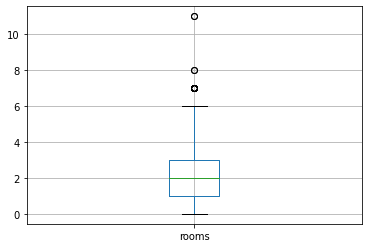

In [38]:
data.boxplot('rooms');

In [39]:
data = data.query('rooms != [0,11,7,8]')
#удаляем строки с аномальными значениями по параметру "количество комнат"

In [40]:
data['rooms'].unique() #проверка обработки

array([3, 1, 2, 4, 5, 6])

In [41]:
data.shape[0] #проверка удаления строк

23252

In [42]:
data.shape[0]/data_rows_before
#проверка остаточного % данных от исходного ДатаФрейма после обработки

0.9811384446601122

На этапе изучения выбивающихся и аномальных значений были обработаны следующие данные:

**_Высота потолков_**:

   a. значения не соответствующие минимальному требованию по ГОСТ (<2.5м) были приведены к нижней границы стандарта, то есть 2.5м;
    
    
   b. было сделано предположение, что указаные значения от 20-40 изначально вещественные числа - поэтому были приведены к таковым с помощью деления данных на 10.
    
    
   с. значения свыше 3-4 метров и до 20 были заменены на медиану исходных данных (2.65м), а также значения свыше 40.
   
**_Общая площадь объекта недвижимости_**:

   - были удалены строки с площадью более 200кв.м, так как по построенной гистрограмме можно увидеть, что за этой границей очень мало данных, то есть имеются выбросы. 
   
**_Количество комнат_**:

   a. удалены строки с аномальным значением "0", так как объект недвижимости (квартира) не может быть без комнат.
   
   
   b. также удалены строки с выбивающимися значениями "11","7" и "8" - определены были с помощью метода, определяющего выбросы ("Ящик с усами")
   
**По итогу обработки для последующего анализа ДатаФрейма было сохранено 98% данных**

### Изучение параметров недвижимости

##### Общая площадь

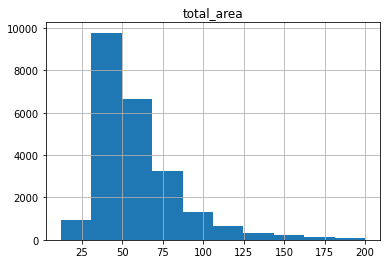

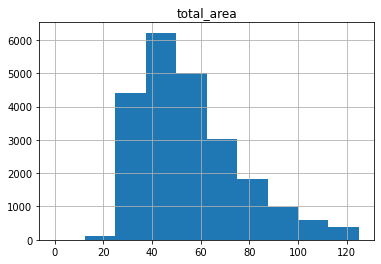

In [43]:
data.hist('total_area');
data.hist('total_area',range = (0,125));

По гистограмме видно, что на основную массу объявлений приходятся объекты с общей площадью от 40м2 до 50м2.

##### Жилая площадь

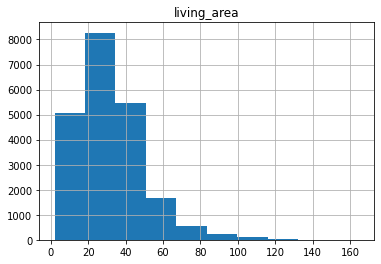

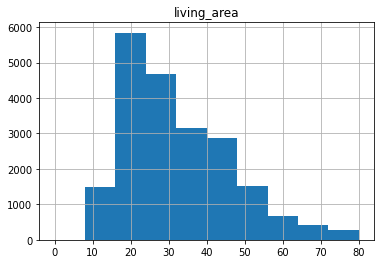

In [44]:
data.hist('living_area');
data.hist('living_area',range = (0,80));

 В основном жилая площадь представлена на рынке в диапозоне от 17м2 до 20м2

##### Площадь кухни

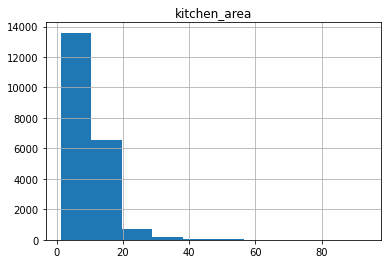

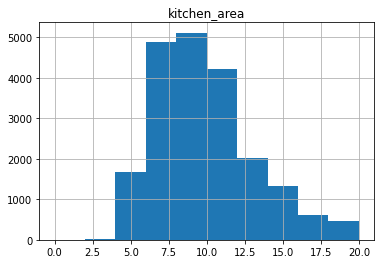

In [45]:
data.hist('kitchen_area');
data.hist('kitchen_area', range = (0,20));

Можем наблюдать, что большинство предложений на рынке недвижимости имеют площадь кухни от 7м2 до 12м2.

##### Цена объекта

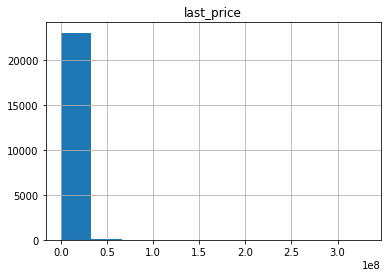

In [46]:
data.hist('last_price');

(-3000000.0, 15000000.0)

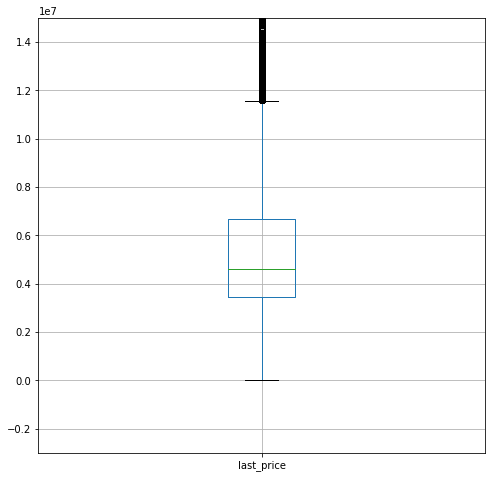

In [47]:
ax = data.boxplot('last_price', figsize=(8, 8))
ax.set_ylim(-3e6, 1.5e7)

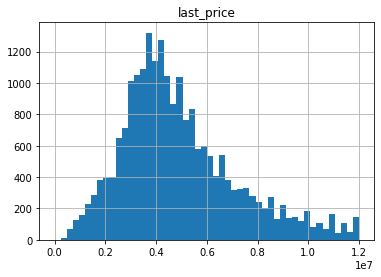

In [48]:
data.hist('last_price',range=(0, 1.2e7), bins=50);

In [49]:
data['last_price'] = data['last_price']/1000000

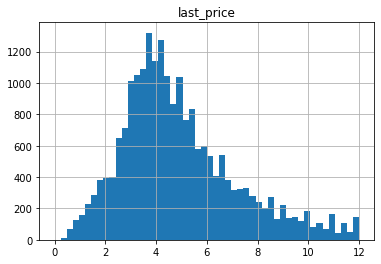

In [50]:
data.hist('last_price',range=(0, 12), bins=50);

Большое количество объявлений на рынке недвижимости предлагают жилье по цене от 3млн. до 5млн.

##### Количество комнат

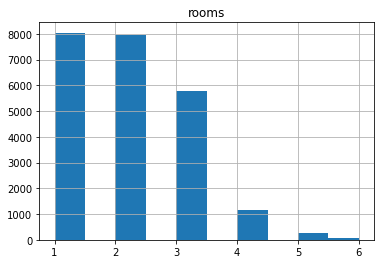

In [51]:
data.hist('rooms');

По гистограмме видим, что предложения на рынке варьируются от 1 до 6 комнат на объект недвижимости. 
Наибольшее количество объявлений на однокомнатные и двухкомнатные квартиры, также есть несколько предложений с 5-6 комнатами, но их значительно меньше.

##### Высота потолков

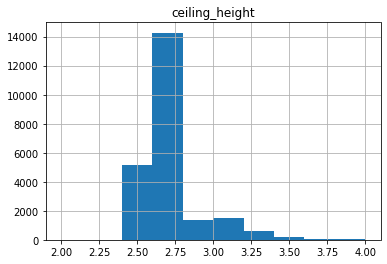

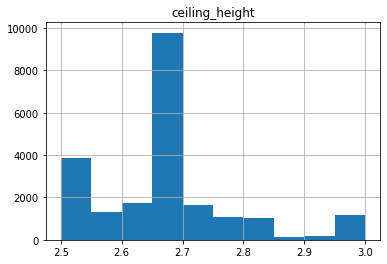

In [52]:
data.hist('ceiling_height');
data.hist('ceiling_height', range = (2.5,3));

Поскольку для замены аномальных значений была использована медиана - 2.65, то большинство наблюдений получилось в районе 2.6-2.7м. Также в объявлениях присутствуют объекты недвижимости с более высокими потолками - свыше 3м, но таких объектов недвижимости значительно меньше на рынке.

##### Тип этажа квартиры

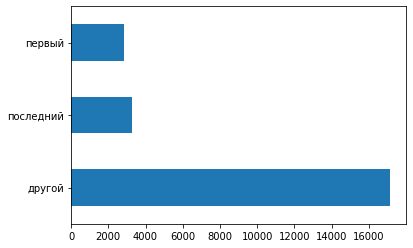

In [53]:
data['type_floor'].value_counts().plot.barh();

По графику видно, что подавляющее большинство объектов недвижимости продаются с расположением, не являющимся первым или последним этажом.

При этом примерно равное количество объявлений на продажу объектов на первых и последних этажах.

##### Общее количество этажей в доме

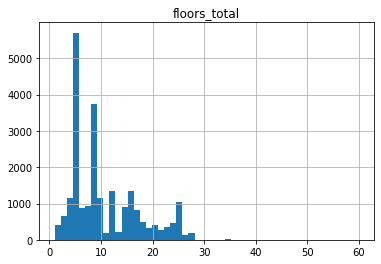

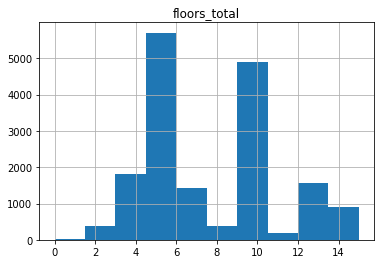

In [54]:
data.hist('floors_total', bins = 50);
data.hist('floors_total', range = (0,15));

По гистограмме видно, что в объявлениях фигурируют в основном 5-этажные дома, на втором месте по количеству предложений 9-этажные объекты. 

##### Расстояние до центра города в метрах

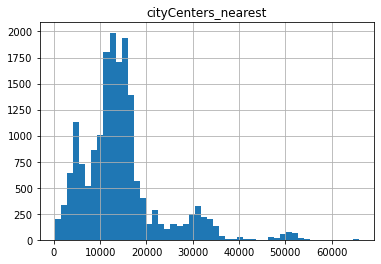

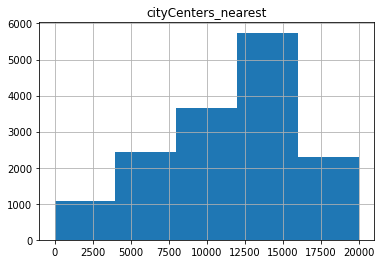

In [55]:
data.hist('cityCenters_nearest', bins = 50);
data.hist('cityCenters_nearest',bins = 5,range = (0,20000));

Большинство объектов располагаются на удалении 12-16км от центра города

##### Расстояние до ближайшего парка

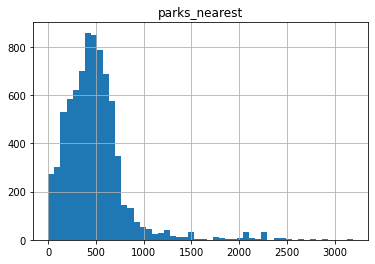

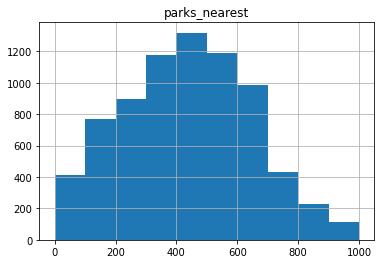

In [56]:
data.hist('parks_nearest', bins = 50);
data.hist('parks_nearest',range = (0,1000));

В объявлениях предлагаются в основном объекты с удаленностью от ближайшего парка 300-600м, большинство из них на удалении 400м.

**Основная масса объектов недвижимости представлена следующими параметрами:**

- общая площадь от 40м2 до 50м2;

- жилая площадь от 17м2 до 20м2;

- площадь кухни от 7м2 до 12м2;

- высота потолков в районе 2.6-2.7м.;

- однокомнатные и двухкомнатные квартиры;

- 5-этажные и 9-этажные объекты недвижимости;

- на удалении 12-16км от центра города и удаленностью от ближайшего парка 300-600м.;

- по цене от 3млн. до 5млн.

### Анализ скорости продажи квартир.

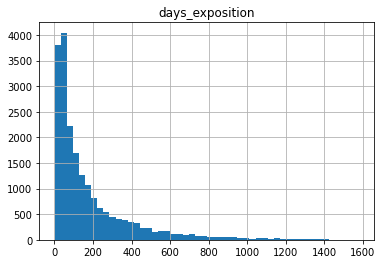

In [57]:
data.hist('days_exposition', bins = 50);

In [58]:
data['days_exposition'].describe()

count    20148.000000
mean       180.325491
std        218.672400
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

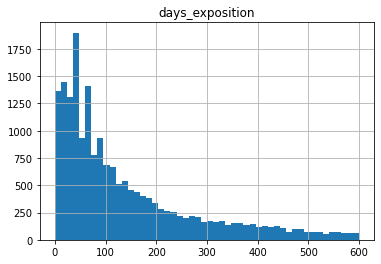

In [59]:
#укрупнение диаграммы за счет ограничения диапозона данных от значений, имеющих малую выборку по данным
data.hist('days_exposition', bins = 50, range = (0,600));

В среднем продажа квартиры занимает 180 дней (около полугода). При этом большое количество продаж было совершено примерно за 50 дней.

Быстрыми продажами можно считать до 50 дней, а вот все, что свыше 800 дней (~2 года) считается уже необычно долгими продажами - по первой гистограмме можно увидеть, что количество наблюдений становится все меньше и они стремятся к нулю.

### Анализ факторов, влияющих на общую (полную) стоимость объекта.

##### Влияние общей площади на цену:

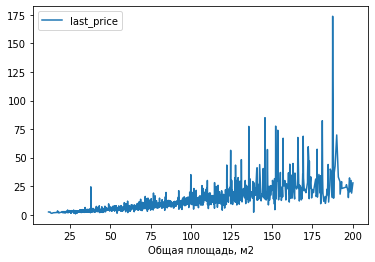

In [60]:
data.pivot_table(index = 'total_area', values = 'last_price')\
            .sort_values('total_area').reset_index().plot(x = 'total_area', y = 'last_price',\
                                    xlabel = 'Общая площадь, м2');

In [61]:
data['total_area'].corr(data['last_price'])

0.6572358880474009

По графику виден тренд: с увеличением общей площади объекта растет его стоимость и также по коэффициенту корреляции видим, что он положительный (0.66)

##### Влияние жилой площади на цену:

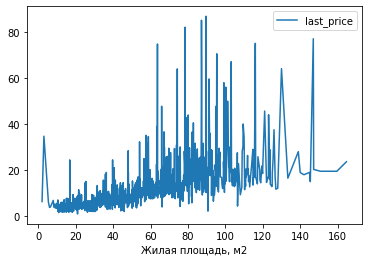

In [62]:
data.pivot_table(index = 'living_area', values = 'last_price')\
            .sort_values('living_area').reset_index().plot(x = 'living_area', y = 'last_price',\
                                    xlabel = 'Жилая площадь, м2');

In [63]:
data['living_area'].corr(data['last_price'])

0.5379415277055515

Положительный коэффициент корреляции говорит о зависимости цены от жилой площади, также по графику можно наблюдать рост цены.

##### Влияние площади кухни на цену:

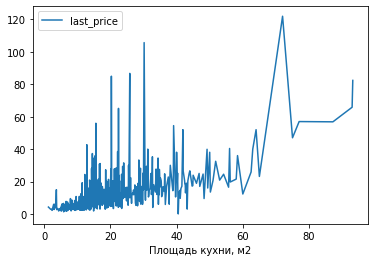

In [64]:
data.pivot_table(index = 'kitchen_area', values = 'last_price')\
            .sort_values('kitchen_area').reset_index().plot(x = 'kitchen_area', y = 'last_price',\
                                    xlabel = 'Площадь кухни, м2');

In [65]:
data['kitchen_area'].corr(data['last_price'])

0.5191849636863506

Положительный коэффициент корреляции говорит о зависимости цены от площади кухни, также по графику можно наблюдать рост цены.

##### Влияние количества комнат на цену:

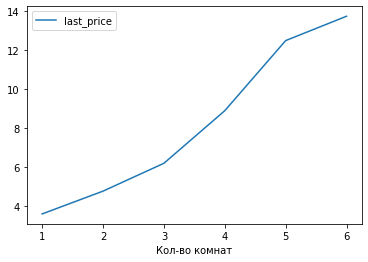

In [66]:
data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')\
            .sort_values('rooms').reset_index().plot(x = 'rooms', y = 'last_price',\
                                    xlabel = 'Кол-во комнат');

In [67]:
data['rooms'].corr(data['last_price'])

0.3736516951655672

График показывает положительный коэффициент зависимости цены от количества комнат в объекте недвижимости,что логично.

С увеличением количества комнат растет стоимость.

##### Влияние этажа, на котором расположена квартира (первый, последний, другой), на цену:

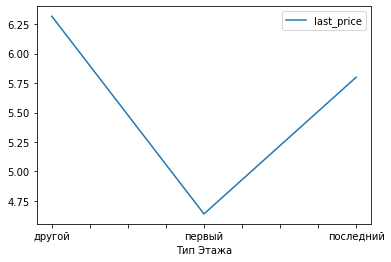

In [68]:
data.pivot_table(index = 'type_floor', values = 'last_price')\
            .sort_values('type_floor').reset_index().plot(x = 'type_floor', y = 'last_price',\
                                    xlabel = 'Тип Этажа');

График говорит о том, что дешевле приобрести объект на первых этажах - на рынке недвижимости существует такая логика, так как первые этажи не сильно привлекательны для покупателя, поэтому чаще всего на них ниже стоимость, чем на аналогичный объект недвижимости, но на другом этаже. А вот, что касается последнего и других этажей разницы сильной не прослеживается.

##### Влияние даты размещения (день недели, месяц, год) на цену:

###### День недели:

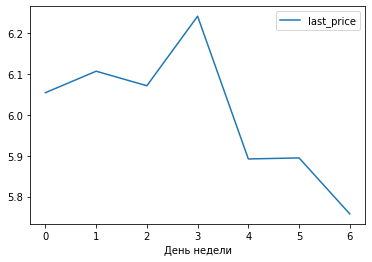

In [69]:
data.pivot_table(index = 'num_weekday', values = 'last_price')\
            .sort_values('num_weekday').reset_index().plot(x = 'num_weekday', y = 'last_price',\
                                    xlabel = 'День недели');


По построенному графику можно наблюдать, что зависимость незначительная - это и подтверждается диапозоном средней стоимости на объект, где на вертикальной шкале незначительный разброс значений.

###### Месяц:

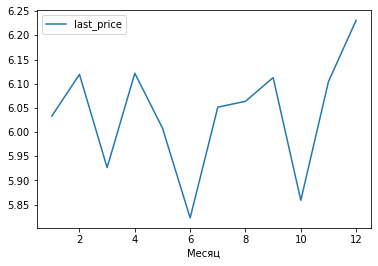

In [70]:
data.pivot_table(index = 'month', values = 'last_price')\
            .sort_values('month').reset_index().plot(x = 'month', y = 'last_price',\
                                    xlabel = 'Месяц');

Аналогично зависимости в разрезе дней недели, диапозон разброса средней стоимости объекта недвижимости очень маленький. Как таковой зависимости не наблюдаем.

###### Год:

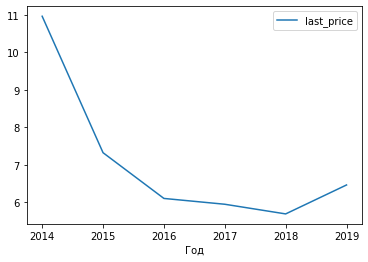

In [71]:
data.pivot_table(index = 'year', values = 'last_price')\
            .sort_values('year').reset_index().plot(x = 'year', y = 'last_price',\
                                    xlabel = 'Год');

В целом по графику наблюдаем тренд на то, что после 2014 года средняя цена на объект недвижимости начала падать.

**В ходе анализа факторов, влияющих на цену объекта, были сделаны следующие выводы:**
    
   _1. Такие параметры как общая площадь, площадь кухни, жилая площадь и количество комнат показывают положительную зависимость, которая говорит о том, что цена при увеличении данных параметров также растет._
   
   
   _2. Тип этажа ("первый", "последний", "другой") - видим зависимоcть, если сравниваем первый этаж к последнему или другому. Зависимость говорит о том, что объекты недвижимости с расположением на первом этаже имеют стоимость ниже, чем объекты на других или последних этажах._
   
   _3. Что касаемо влияния даты размещения (день недели, месяц) на цену, то здесь можно заключить, что явной зависимости не наблюдаем - на графиках средняя цена варьируется на очень маленьком диапозоне данных. 
Говоря о зависимости по году, то наблюдаем следующий тренд, что после 2014 года средняя цена на объект недвижимости начала падать._

### Анализ средней стоимости кв.м объекта недвижимости в зависимости от населенного пункта.

In [72]:
data.groupby(['locality_name'])['price_per_metr2'].agg(['count','mean']).reset_index()\
        .sort_values('count',ascending = False).head(10).reset_index(drop = True)

,locality_name,count,mean
0,Санкт-Петербург,15375,113481.007564
1,поселок Мурино,529,85004.057807
2,поселок Шушары,436,78405.738532
3,Всеволожск,392,68618.013724
4,Пушкин,364,103122.538929
5,Колпино,337,75333.295816
6,поселок Парголово,322,90448.423416
7,Гатчина,307,68746.146515
8,деревня Кудрово,283,92297.218834
9,Выборг,237,58141.909325


Анализируя среднюю стоимость квадратного метра в разрезе топ-10 населенных пунктов по количеству объявлений на рынке, можно сделать следующие выводы:

   1. Наиболее высокая стоимость преобладает в Санкт-Петербурге.
   2. А дешевле всего приобретать объект недвижимости в Выборге.

### Анализ средней цены объекта в г. Санкт-Петербург в зависимости от удаленности от центра города

In [73]:
data_spb = data.query('locality_name == "Санкт-Петербург"')#выделяем данные только по Санкт-Петербургу
data_spb['locality_name'].unique()#проверка среза

array(['Санкт-Петербург'], dtype=object)

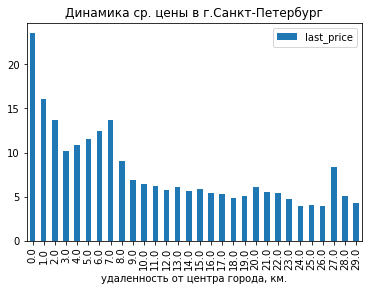

In [74]:
data_spb.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price').reset_index()\
    .plot(x = 'cityCenters_nearest_km', y = 'last_price', kind = 'bar',\
         title = 'Динамика ср. цены в г.Санкт-Петербург', xlabel = 'удаленность от центра города, км.');

По графику можем увидеть, что чем ближе к центру города, тем выше средняя стоимость объекта недвижимости и с удаленнием от центра она снижается, что в целом логично. 

Объекты недвижимости, находящиеся прям рядом с центром стоят в среднем выше 15 млн.руб. А начиная, примерно, с удаленности 10км и дальше средняя цена объекта снижается к 5млн. руб. и ниже.

## Общий вывод

В рамках исследования были получены и обработаны данные, предоставленные сервисом Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

**Первым этапом была проведена предобработка данных, по итогам которой выявлены:**

1. Пропуски в большинстве столбцов исходной таблицы, но заменены были следующие:

    a. в столбце 'ceiling_height' произведена замена на медиану;
    
    b. в столбцах 'balcony','parks_around3000','ponds_around3000' заменены пропуски на значение "0";
    
    c. в столбце 'is_apartment' - на значения "False";
    
    d. в столбце 'locality_name' на обозначение "unknown".
    

2. Некорректно присвоенные типы данных:

    a. 'balcony', 'parks_around3000' и 'ponds_around3000' - приведены к целым числам (int);
    
    b. 'first_day_exposition' - приведен к соответствующему типу данных "datetime";
    
    c. 'floors_total' - данный параметр тоже следовало бы привести к типу 'int', так как количество этажей всегда является целым числом. Но поскольку имеются пропуски, то привести к нужному типу 'int' нет возможности - критично на анализ и данные не должен повлиять тип данных 'float'.


3. Неявные дубликаты в столбце 'locality_name': произведена замена "посЁлок" на "посЕлок" и "городской поселок","поселок городского типа" на "поселок".


**Вторым этапом были добавлены дополнительные параметры для более глубокого анализа:**

- цена одного квадратного метра;

- день недели, месяц и год публикации объявления;

- тип этажа квартиры;

- расстояние до центра города в км.


**Третьим этапом была произведена обработка аномальных и выбивающихся значений по трем параметрам:**

_Высота потолков:_

   1. значения не соответствующие минимальному требованию по ГОСТ (<2.5м) были приведены к нижней границы стандарта, то есть 2.5м;
   

   2. было сделано предположение, что указаные значения от 20-40 изначально вещественные числа - поэтому были приведены к таковым с помощью деления данных на 10.
   

   3. значения свыше 3-4 метров и до 20 были заменены на медиану исходных данных (2.65м), а также значения свыше 40.


   _Общая площадь объекта недвижимости:_ были удалены строки с площадью более 200кв.м, так как за этой границей очень мало данных, которые были квалифицированы как выбросы.


   _Количество комнат:_
   

   1. удалены строки с аномальным значением "0", так как объект недвижимости (квартира) не может быть без комнат.


   2. также удалены строки с выбивающимися значениями "11","7" и "8" - определены были с помощью метода, определяющего выбросы ("Ящик с усами").
   

По итогу обработки для последующего анализа ДатаФрейма было сохранено 98% данных

**Четвертым этапом был выполнен исследовательский анализ:**

_1. Выделенных параметров:_

Основная масса объектов недвижимости представлена следующими параметрами:

- общая площадь от 40м2 до 50м2;

- жилая площадь от 17м2 до 20м2;

- площадь кухни от 7м2 до 12м2;

- высота потолков в районе 2.6-2.7м.;

- однокомнатные и двухкомнатные квартиры;

- 5-этажные и 9-этажные объекты недвижимости;

- на удалении 12-16км от центра города и удаленностью от ближайшего парка 300-600м.;

- по цене от 3млн. до 5млн.

_2. Cкорости продажи квартир:_

В среднем продажа квартиры занимает 180 дней (около полугода). При этом большое количество продаж было совершено примерно за 50 дней. Быстрыми продажами можно считать до 50 дней, а вот все, что свыше 800 дней (~2 года) считается уже необычно долгими продажами.

_3. Факторов, влияющих на общую (полную) стоимость объекта:_

a. Такие параметры как общая площадь, площадь кухни, жилая площадь и количество комнат показывают положительную зависимость, которая говорит о том, что цена при увеличении данных параметров также растет.

b. Тип этажа ("первый", "последний", "другой") - видим зависимоcть, если сравниваем первый этаж к последнему или другому. Зависимость говорит о том, что объекты недвижимости с расположением на первом этаже имеют стоимость ниже, чем объекты на других или последних этажах.

_4. Средней стоимости кв.м объекта недвижимости в зависимости от населенного пункта (рейтинг топ10 по количеству объявлений):_

Наиболее высокая стоимость преобладает в Санкт-Петербурге, а дешевле всего приобретать объект недвижимости в Выборге.

_5. Средней цены объекта в г. Санкт-Петербург в зависимости от удаленности от центра города:_

Чем ближе к центру города, тем выше средняя стоимость объекта недвижимости и с удаленнием от центра она снижается, что в целом логично. Объекты недвижимости, находящиеся прям рядом с центром стоят в среднем выше 15 млн.руб. А начиная, примерно, с удаленности 10км и дальше средняя цена объекта снижается к 5млн. руб. и ниже.